# Business Understanding

## Project Domain
Proyek ini berada di domain kesehatan, khususnya dalam analisis data medis laboratorium untuk membantu diagnosis awal penyakit hati seperti Hepatitis C, Fibrosis, dan Cirrhosis. Dengan pendekatan data-driven, kita bertujuan meningkatkan efisiensi dan akurasi diagnosis medis

## Problem Statements
Diagnosa penyakit hati seperti Hepatitis C sering kali memerlukan pemeriksaan lanjutan yang mahal dan invasif. Namun, hasil uji laboratorium darah sudah mengandung informasi penting yang bisa dimanfaatkan. Tantangannya adalah:

Bagaimana kita bisa memanfaatkan data hasil laboratorium darah untuk mengklasifikasikan kondisi pasien?

Dapatkah model machine learning digunakan untuk membantu profesional medis dalam skrining awal pasien?

## Goals
Membangun model klasifikasi berbasis Artificial Neural Network (ANN) yang mampu memprediksi kategori penyakit hati dari data laboratorium pasien.

Menghasilkan sistem yang dapat di-deploy ke aplikasi web sehingga bisa digunakan secara interaktif oleh pengguna atau tenaga medis.

Memberikan prediksi otomatis terhadap kategori seperti: Blood Donor, Hepatitis, Fibrosis, atau Cirrhosis.

## Solution Statements
Menggunakan dataset Hepatitis C dari Kaggle yang berisi fitur-fitur laboratorium seperti ALT, AST, ALP, CHE, dan lainnya.

Melakukan pra-pemrosesan data termasuk encoding, scaling, dan pembersihan missing values.

Melatih model ANN menggunakan TensorFlow dan mengevaluasinya dengan metrik klasifikasi.

Mengkonversi model ke format .tflite agar ringan dan siap digunakan dalam deployment.

Membangun aplikasi berbasis Streamlit untuk memungkinkan user memasukkan data manual dan mendapatkan prediksi secara langsung.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fikriiiii","key":"5860161ca59edb6c2b27fcbf875e4c54"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d fedesoriano/hepatitis-c-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset
License(s): ODbL-1.0


In [4]:
!mkdir fedesoriano/hepatitis-c-dataset.zip
!unzip fedesoriano/hepatitis-c-dataset -d fedesoriano/hepatitis-c-dataset
!ls fedesoriano/hepatitis-c-dataset

mkdir: cannot create directory ‘fedesoriano/hepatitis-c-dataset.zip’: No such file or directory
unzip:  cannot find or open fedesoriano/hepatitis-c-dataset, fedesoriano/hepatitis-c-dataset.zip or fedesoriano/hepatitis-c-dataset.ZIP.
ls: cannot access 'fedesoriano/hepatitis-c-dataset': No such file or directory


In [5]:
!unzip hepatitis-c-dataset.zip -d hepatitis-c-dataset

Archive:  hepatitis-c-dataset.zip
  inflating: hepatitis-c-dataset/HepatitisCdata.csv  


## Import Library yang dibutuhkan

In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

## Exploratory Data Analysis

In [9]:
df = pd.read_csv("hepatitis-c-dataset/HepatitisCdata.csv")

print(df.columns)


Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [10]:
print(df.columns)

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [11]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Jumlah missing value per kolom:
 Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


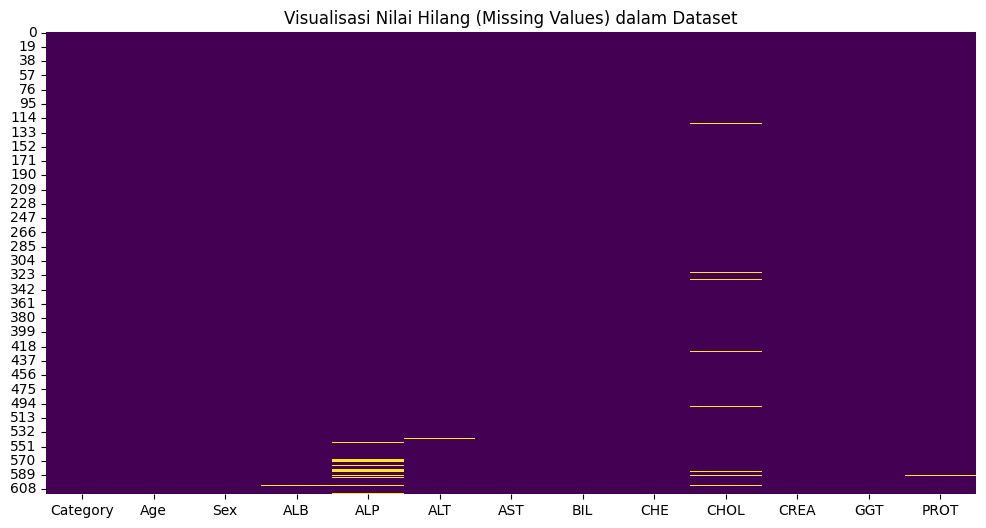

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hepatitis-c-dataset/HepatitisCdata.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

# Hitung missing value per kolom
missing_counts = df.isnull().sum()
print("Jumlah missing value per kolom:\n", missing_counts)

# Visualisasi heatmap untuk nilai hilang
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Nilai Hilang (Missing Values) dalam Dataset")
plt.show()


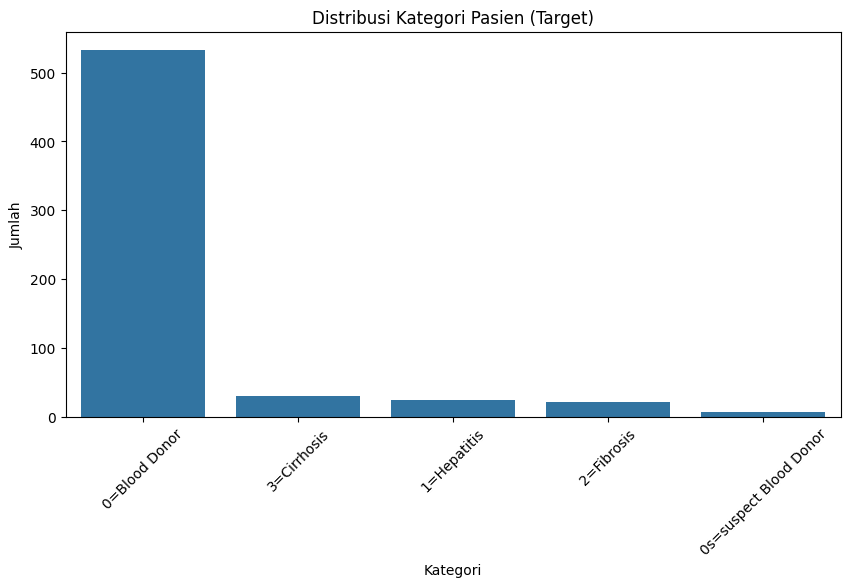

Category
0=Blood Donor             86.666667
3=Cirrhosis                4.878049
1=Hepatitis                3.902439
2=Fibrosis                 3.414634
0s=suspect Blood Donor     1.138211
Name: proportion, dtype: float64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi target
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title("Distribusi Kategori Pasien (Target)")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

# Tampilkan juga proporsinya
print(df['Category'].value_counts(normalize=True) * 100)


In [16]:
print(df.describe())

              Age         ALB         ALP         ALT         AST         BIL  \
count  615.000000  614.000000  597.000000  614.000000  615.000000  615.000000   
mean    47.408130   41.620195   68.283920   28.450814   34.786341   11.396748   
std     10.055105    5.780629   26.028315   25.469689   33.090690   19.673150   
min     19.000000   14.900000   11.300000    0.900000   10.600000    0.800000   
25%     39.000000   38.800000   52.500000   16.400000   21.600000    5.300000   
50%     47.000000   41.950000   66.200000   23.000000   25.900000    7.300000   
75%     54.000000   45.200000   80.100000   33.075000   32.900000   11.200000   
max     77.000000   82.200000  416.600000  325.300000  324.000000  254.000000   

              CHE        CHOL         CREA         GGT        PROT  
count  615.000000  605.000000   615.000000  615.000000  614.000000  
mean     8.196634    5.368099    81.287805   39.533171   72.044137  
std      2.205657    1.132728    49.756166   54.661071    5.402

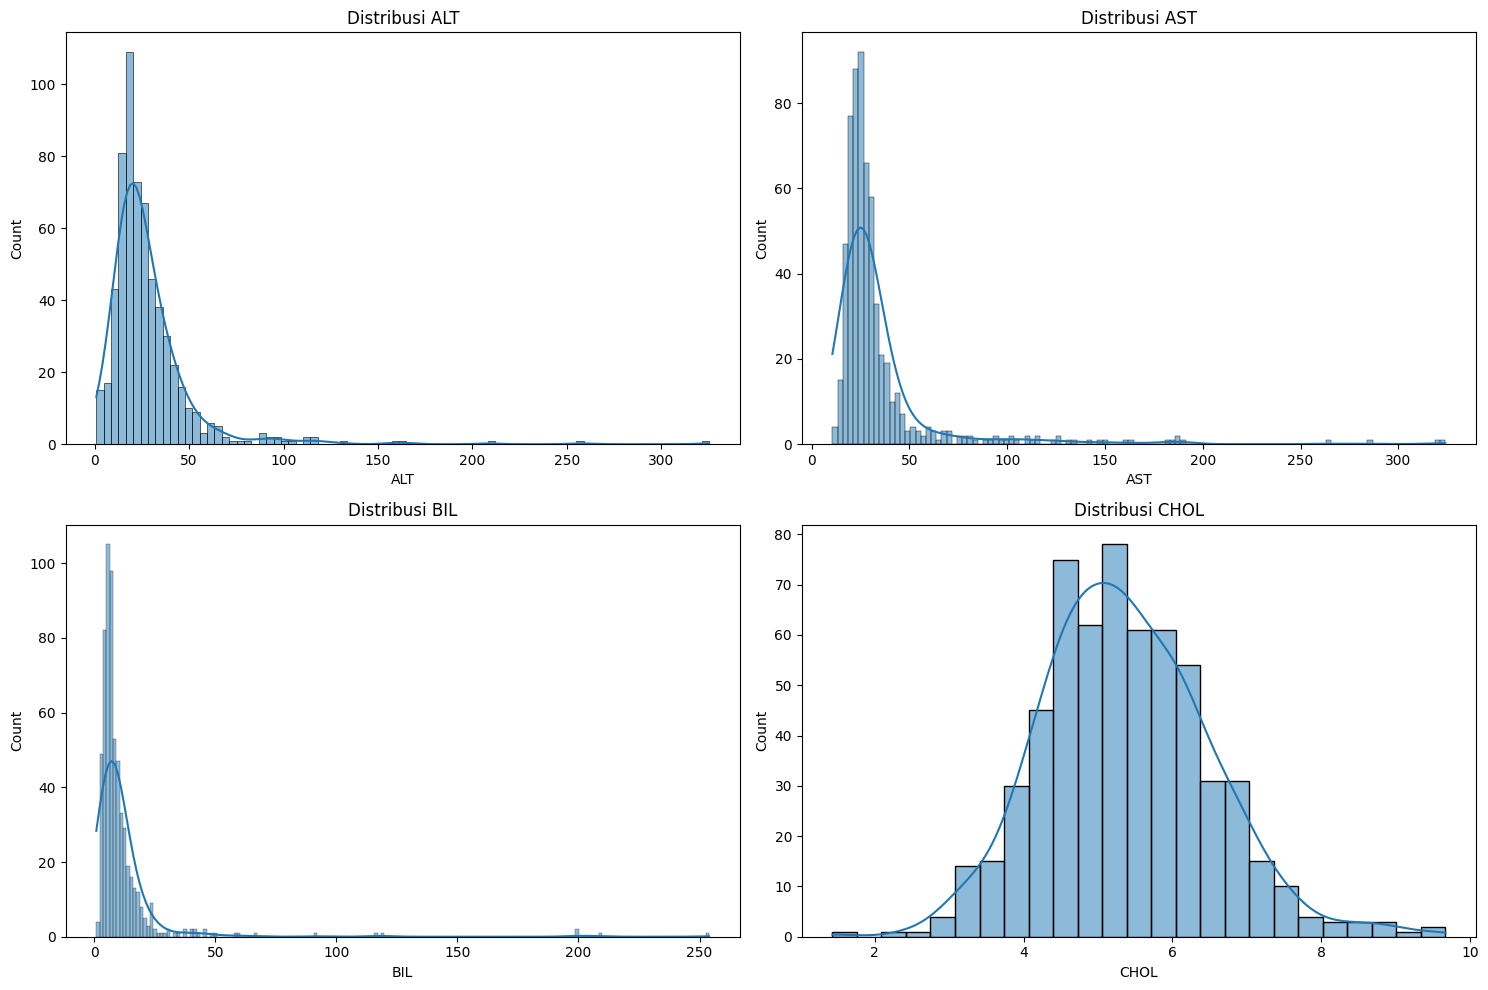

In [17]:
numeric_features = ['ALT', 'AST', 'BIL', 'CHOL']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

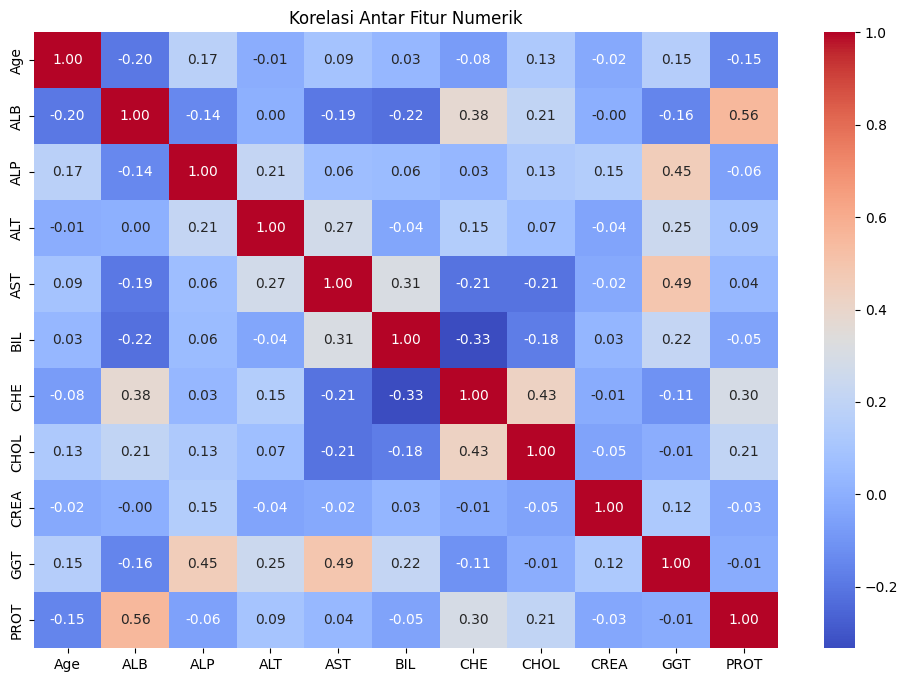

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

## Preprocessing

In [20]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [21]:
df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

In [22]:
print(df['Category'].unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [23]:
category_map = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4
}
df['Category'] = df['Category'].map(category_map)

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Pisahkan fitur dan label
X = df.drop('Category', axis=1)
y = df['Category']

# Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Modeling

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [28]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [29]:
model = Sequential()

# Input layer dan hidden layer pertama
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))

# Hidden layer kedua
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer (jumlah neuron = jumlah kelas)
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    X_train, y_train_encoded,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5220 - loss: 1.4249 - val_accuracy: 0.8687 - val_loss: 0.9596
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8736 - loss: 0.8657 - val_accuracy: 0.8687 - val_loss: 0.5586
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8550 - loss: 0.6355 - val_accuracy: 0.8687 - val_loss: 0.5232
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8724 - loss: 0.5857 - val_accuracy: 0.8687 - val_loss: 0.5164
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8751 - loss: 0.5263 - val_accuracy: 0.8687 - val_loss: 0.5054
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8648 - loss: 0.5414 - val_accuracy: 0.8687 - val_loss: 0.4933
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8747 - loss: 0.5011 - val_accuracy: 0.8687 - val_loss: 0.4782
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8659 - loss: 0.5084 - val_accuracy: 0.8788 - val_loss

# Evaluation

In [32]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9311 - loss: 0.2274
Test Accuracy: 0.93


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


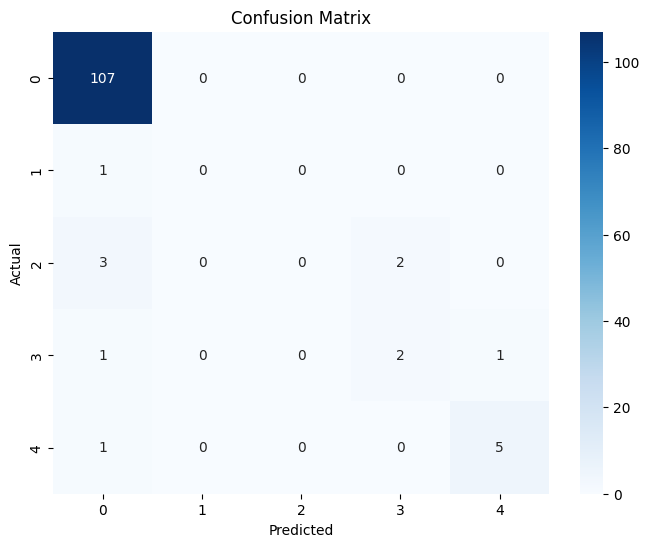

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         5
           3       0.50      0.50      0.50         4
           4       0.83      0.83      0.83         6

    accuracy                           0.93       123
   macro avg       0.46      0.47      0.46       123
weighted avg       0.88      0.93      0.90       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

In [35]:
# Contoh data baru: [Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT]
# Sex: m=0, f=1
new_patient = [[45, 0, 39.0, 65.0, 28.0, 32.0, 5.2, 8.0, 4.2, 88.0, 30.0, 72.0]]
new_patient_scaled = scaler.transform(new_patient)

prediction = model.predict(new_patient_scaled)
predicted_class = np.argmax(prediction)

# Mapping balik
inv_category_map = {
    0: 'Blood Donor',
    1: 'Suspect Blood Donor',
    2: 'Hepatitis',
    3: 'Fibrosis',
    4: 'Cirrhosis'
}

print(f"Prediksi Kategori Pasien: {inv_category_map[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediksi Kategori Pasien: Blood Donor


## Save Model

In [36]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [37]:
model.save("hepatitis_model.h5")

In [38]:
# Konversi model Keras ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan .tflite file
with open("hepatitis_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpaiojb4qd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140054993285392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140054993286544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140054993285776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140054993276752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140054993288272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140054993289040: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Deployment